# Viz with cleaned and standardized data

In [98]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/churn_train.csv', parse_dates=['last_trip_date','signup_date'])
from data_clean import Cleaner
clnr = Cleaner()
clnr.stage_cleaning(df)
clean_data_unscaled = clnr.clean(df)

In [99]:
#getting column names to use after next step (re-name cols on new df)
list(clean_data_unscaled);

In [100]:
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
from sklearn import preprocessing

x = clean_data_unscaled.values #returns a numpy array
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
clean_data = pd.DataFrame(x_scaled)
# clean_data['churn'] = clean_data_unscaled['churn'] #adding churn column
clean_data.columns = list(clean_data_unscaled) 
# ['Android',
#  'iPhone',
#  'inactive_days',
#  'acct_age',
#  'rider_rtg',
#  'driver_rtg',
#  'avg_dist',
#  'avg_surge',
#  'surge_pct',
#  'first_30',
#  'black',
#  'weekday_pct',
#  'Astapor',
#  'Winterfell']

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [101]:
#creating binary churn column - code inspiration from: https://stackoverflow.com/questions/21702342/creating-a-new-column-based-on-if-elif-else-condition
clean_data.loc[df['last_trip_date'] > '2014-05-31', 'churn'] = 0  # did not churns
clean_data.loc[df['last_trip_date'] < '2014-06-01', 'churn'] = 1  # did churns
#adding churn column to clean_data (order of cells in the notebook matters here)
# clean_data['churn'] = clean_data_unscaled['churn']
clean_data.tail()

,Android,rider_rtg,driver_rtg,avg_dist,avg_surge,surge_pct,first_30,black,weekday_pct,surge_bool,risky_rating,Astapor,Winterfell,churn
39995,1.52272,0.048424,-0.581705,-0.653699,0.022679,0.032111,1.500640,-0.776498,0.798768,1.487045,0.0,-0.703239,1.071554,1.0
39996,-0.65672,0.495454,0.655430,-0.655451,-0.336995,-0.442563,-0.073651,-0.776498,0.669350,-0.672474,0.0,-0.703239,-0.933224,1.0
39997,1.52272,0.495454,0.655430,-0.482009,-0.336995,-0.442563,0.188731,1.287833,-0.743462,-0.672474,0.0,-0.703239,1.071554,0.0
39998,-0.65672,-1.069150,-2.349042,-0.403172,1.910964,1.556062,0.713495,-0.776498,-0.023575,1.487045,0.0,1.421992,-0.933224,1.0
39999,-0.65672,-0.175090,0.655430,-0.270026,-0.336995,-0.442563,-0.073651,1.287833,-0.484626,-0.672474,0.0,1.421992,-0.933224,0.0


In [102]:
pivot_mean = pd.pivot_table(clean_data, columns='churn', aggfunc=np.mean)
pivot_mean

churn,0.0,1.0
Android,-0.291643,0.175584
Astapor,-0.226363,0.136282
Winterfell,-0.060201,0.036244
avg_dist,-0.120336,0.072448
avg_surge,-0.004054,0.002441
black,0.266654,-0.160539
driver_rtg,-0.037538,0.022600
first_30,0.271520,-0.163469
rider_rtg,-0.036271,0.021837
risky_rating,0.000000,0.000000


### Creating a dataframe (from 'pivot_mean' table) more amenable to seaborn barplot

In [103]:
churn_col = pd.DataFrame(pivot_mean[1])
churn_col['churn'] = 1
churn_col.columns = ['mean', 'churn']

In [104]:
non_churn_col = pd.DataFrame(pivot_mean[0])
non_churn_col['churn'] = 0
non_churn_col.columns = ['mean', 'churn']

In [105]:
new_df = churn_col.append(non_churn_col)
new_df.reset_index(level=0, inplace=True)

#dropping acct_age and inactive_days because they're uninformative and skew the y-axis of the plot below
viz_df = new_df[(new_df['index'] != 'acct_age') & (new_df['index'] != 'inactive_days')]
viz_df

,index,mean,churn
0,Android,0.175584,1
1,Astapor,0.136282,1
2,Winterfell,0.036244,1
3,avg_dist,0.072448,1
4,avg_surge,0.002441,1
5,black,-0.160539,1
6,driver_rtg,0.022600,1
7,first_30,-0.163469,1
8,rider_rtg,0.021837,1
9,risky_rating,0.000000,1


Text(0.5, 1.0, 'Scaled data')

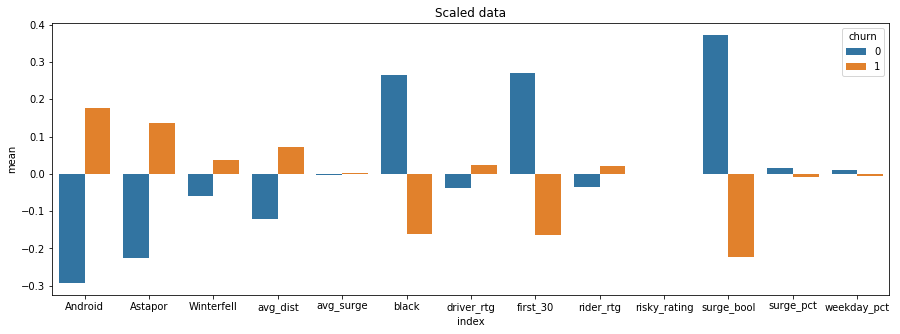

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 5))
ax = sns.barplot(x='index', y='mean', hue='churn', data=viz_df)
plt.title('Scaled data')